In [34]:
import FinanceDataReader as fdr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 스타일 지정
# plt.style.use('ggplot')

# matplotlib 한글폰트 지정
plt.rc('font',family='AppleGothic')
plt.rc('axes', unicode_minus=False)

In [2]:
#나스닥
nasdaq = fdr.StockListing('NASDAQ')
nasdaq['Indexes'] = 'NASDAQ'

#뉴욕증권거래소
nyse = fdr.StockListing('NYSE')
nyse['Indexes'] = 'NYSE'

#아맥스
amax = fdr.StockListing('AMEX')
amax['Indexes'] = 'AMEX'

100%|████████████████████████████████████████| 329/329 [00:00<00:00, 635.92it/s]


In [3]:
#데이터 합치기
df = pd.concat([nasdaq,nyse,amax])

#Symbol이 중복되는 데이터 제거
df = df.drop_duplicates('Symbol')



In [4]:
nasdaq = nasdaq[nasdaq['Symbol'] != 'GOOG']
nasdaq.head(10)

,Symbol,Name,IndustryCode,Industry,Indexes
0,MSFT,Microsoft Corp,57201020,소프트웨어,NASDAQ
1,AAPL,Apple Inc,57106020,전화 및 소형 장치,NASDAQ
2,NVDA,NVIDIA Corp,57101010,반도체,NASDAQ
3,AMZN,Amazon.com Inc,53402010,백화점,NASDAQ
4,META,Meta Platforms Inc,57201030,온라인 서비스,NASDAQ
5,GOOGL,Alphabet Inc Class A,57201030,온라인 서비스,NASDAQ
7,TSLA,Tesla Inc,53101010,자동차 및 트럭 제조,NASDAQ
8,AVGO,Broadcom Inc,57101010,반도체,NASDAQ
9,ASML,ASML Holding NV ADR,57101020,반도체 장비 및 테스트,NASDAQ
10,COST,Costco Wholesale Corp,53402020,할인점,NASDAQ


In [5]:
# '백화점'인 경우를 '온라인 소매업'으로 변경
nasdaq['Industry'] = nasdaq['Industry'].replace('백화점', '온라인 소매업')

# 변경된 데이터 확인
nasdaq.head(10)

,Symbol,Name,IndustryCode,Industry,Indexes
0,MSFT,Microsoft Corp,57201020,소프트웨어,NASDAQ
1,AAPL,Apple Inc,57106020,전화 및 소형 장치,NASDAQ
2,NVDA,NVIDIA Corp,57101010,반도체,NASDAQ
3,AMZN,Amazon.com Inc,53402010,온라인 소매업,NASDAQ
4,META,Meta Platforms Inc,57201030,온라인 서비스,NASDAQ
5,GOOGL,Alphabet Inc Class A,57201030,온라인 서비스,NASDAQ
7,TSLA,Tesla Inc,53101010,자동차 및 트럭 제조,NASDAQ
8,AVGO,Broadcom Inc,57101010,반도체,NASDAQ
9,ASML,ASML Holding NV ADR,57101020,반도체 장비 및 테스트,NASDAQ
10,COST,Costco Wholesale Corp,53402020,할인점,NASDAQ


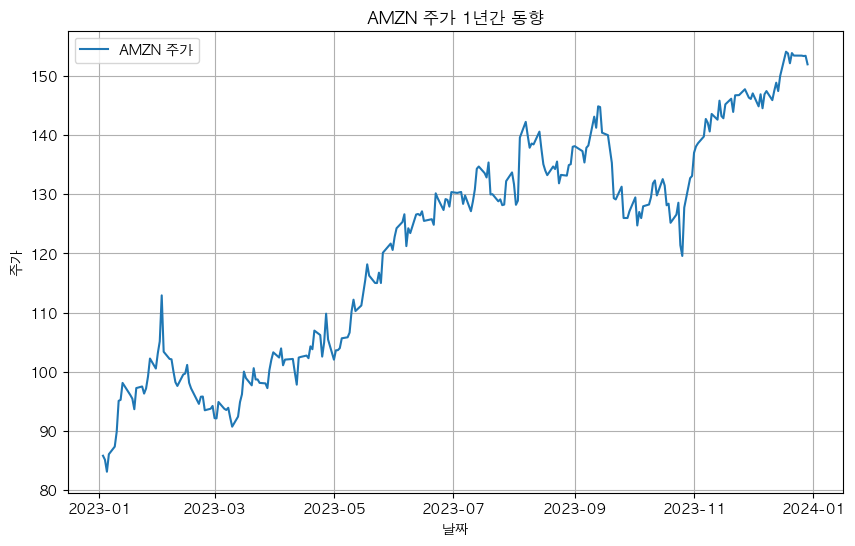

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

# AMZ(Amazon)의 주가 데이터 가져오기
amz_stock = fdr.DataReader('AMZN', '2023-01-01', '2024-01-01')

# 주가 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(amz_stock['Close'], label='AMZN 주가')
plt.title('AMZN 주가 1년간 동향')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


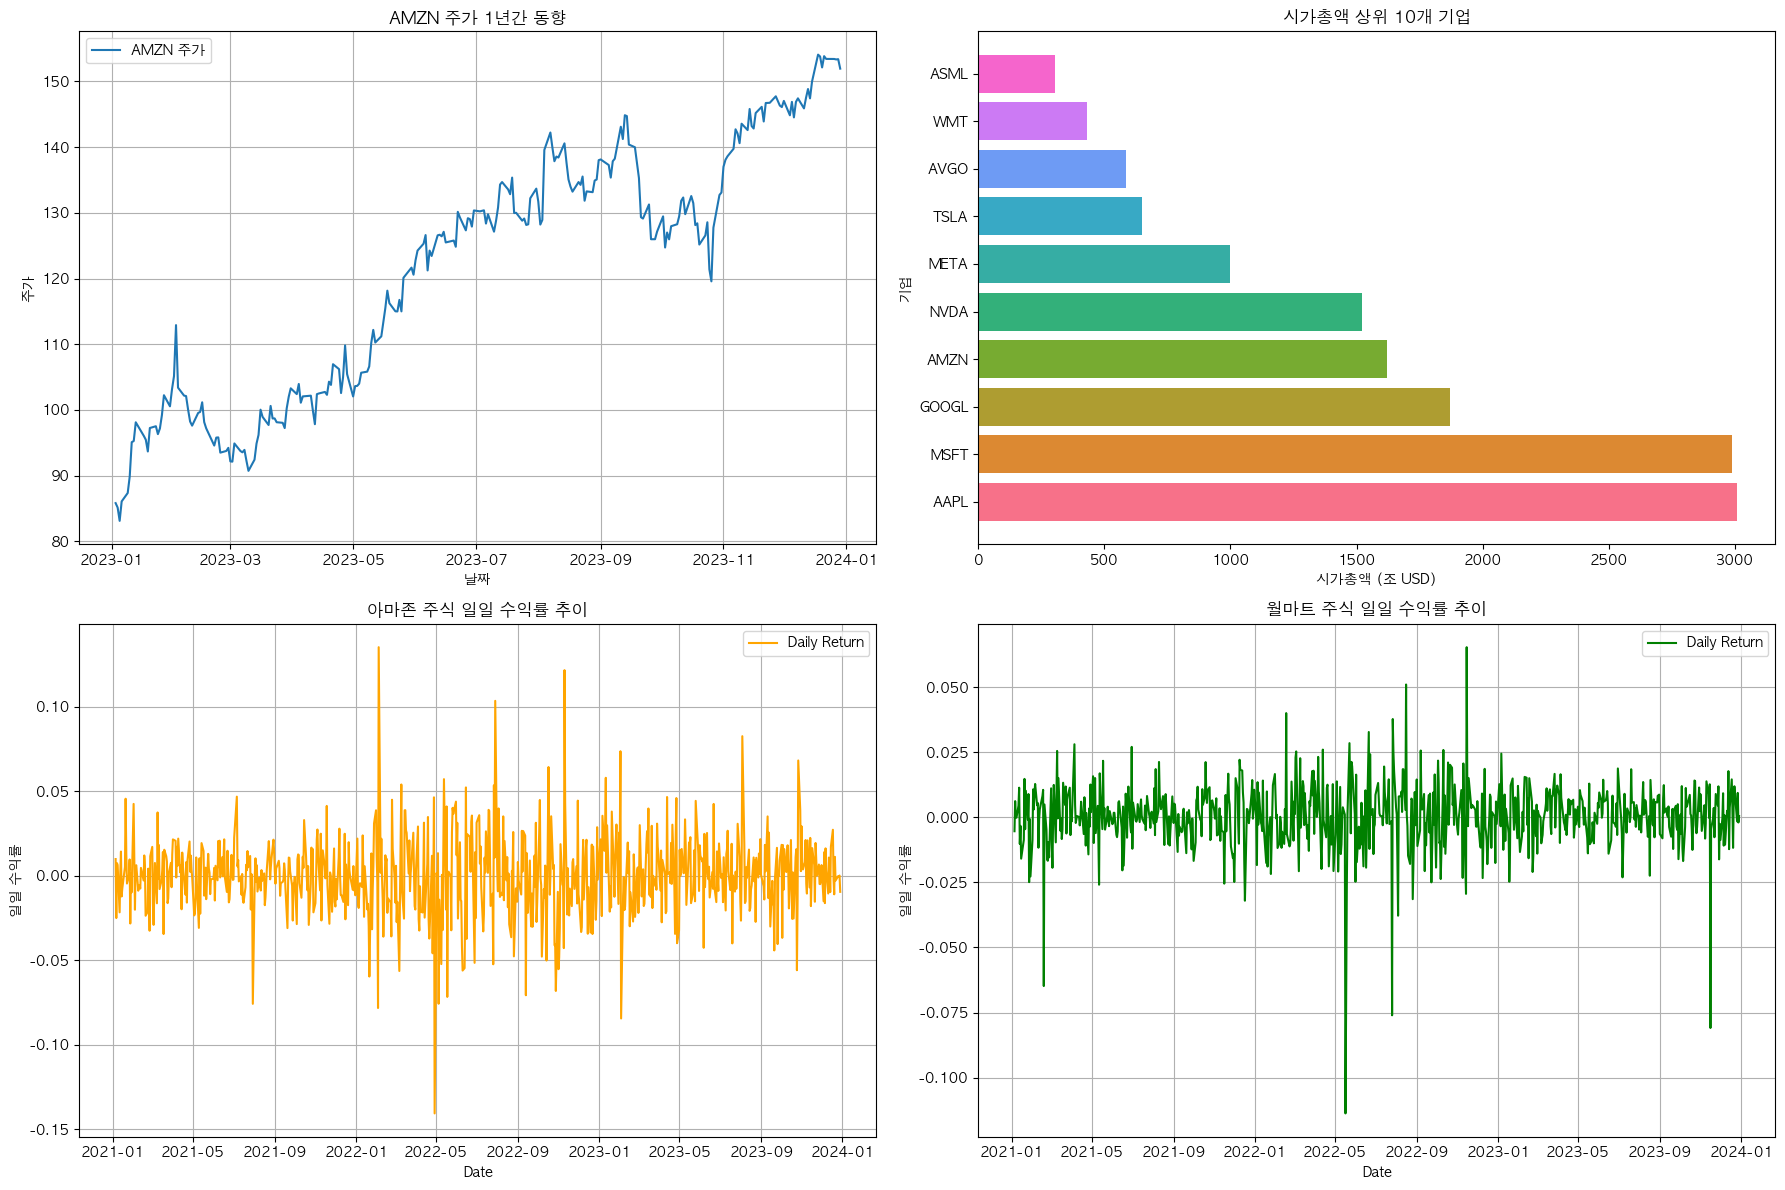

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import seaborn as sns
import yfinance as yf

# AMZ(Amazon)의 주가 데이터 가져오기
amz_stock = fdr.DataReader('AMZN', '2023-01-01', '2024-01-01')

# 주가 데이터 시각화
plt.figure(figsize=(18, 12))  # 가로 길이를 더 크게 조절

# 그래프 1: AMZN 주가
plt.subplot(2, 2, 1)
plt.plot(amz_stock['Close'], label='AMZN 주가')
plt.title('AMZN 주가 1년간 동향')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.legend()
plt.grid(True)

# 주어진 시가총액 데이터
market_caps = {
    'AAPL': 3010,
    'MSFT': 2990,
    'AMZN': 1620,
    'NVDA': 1520,
    'GOOGL': 1870,
    'META': 1000,
    'ASML': 305.498,
    'TSLA': 651.229,
    'AVGO': 586.987,
    'WMT': 432.104
}

# 시가총액 기준으로 내림차순 정렬
sorted_market_caps = dict(sorted(market_caps.items(), key=lambda item: item[1], reverse=True))

# 다양한 색상을 사용하기 위해 seaborn의 color_palette 활용
colors = sns.color_palette('husl', n_colors=len(sorted_market_caps))

# 그래프 2: 시가총액 상위 10개 기업
plt.subplot(2, 2, 2)
plt.barh(list(sorted_market_caps.keys()), list(sorted_market_caps.values()), color=colors)
plt.title('시가총액 상위 10개 기업')
plt.xlabel('시가총액 (조 USD)')
plt.ylabel('기업')

# 아마존 주식 데이터 다운로드
amazon_data = yf.download("AMZN", start="2021-01-01", end="2024-01-01")

# 그래프 3: 아마존 주식 일일 수익률 추이
plt.subplot(2, 2, 3)
amazon_data['Daily_Return'] = amazon_data['Adj Close'].pct_change()
plt.plot(amazon_data.index, amazon_data['Daily_Return'], label='Daily Return', color='orange')
plt.title('아마존 주식 일일 수익률 추이')
plt.xlabel('Date')
plt.ylabel('일일 수익률')
plt.legend()
plt.grid(True)

# 월마트 주식 데이터 다운로드
wmt_data = yf.download("WMT", start="2021-01-01", end="2024-01-01")

# 그래프 4: 월마트 주식 일일 수익률 추이
plt.subplot(2, 2, 4)
wmt_data['Daily_Return'] = wmt_data['Adj Close'].pct_change()
plt.plot(wmt_data.index, wmt_data['Daily_Return'], label='Daily Return', color='green')
plt.title('월마트 주식 일일 수익률 추이')
plt.xlabel('Date')
plt.ylabel('일일 수익률')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


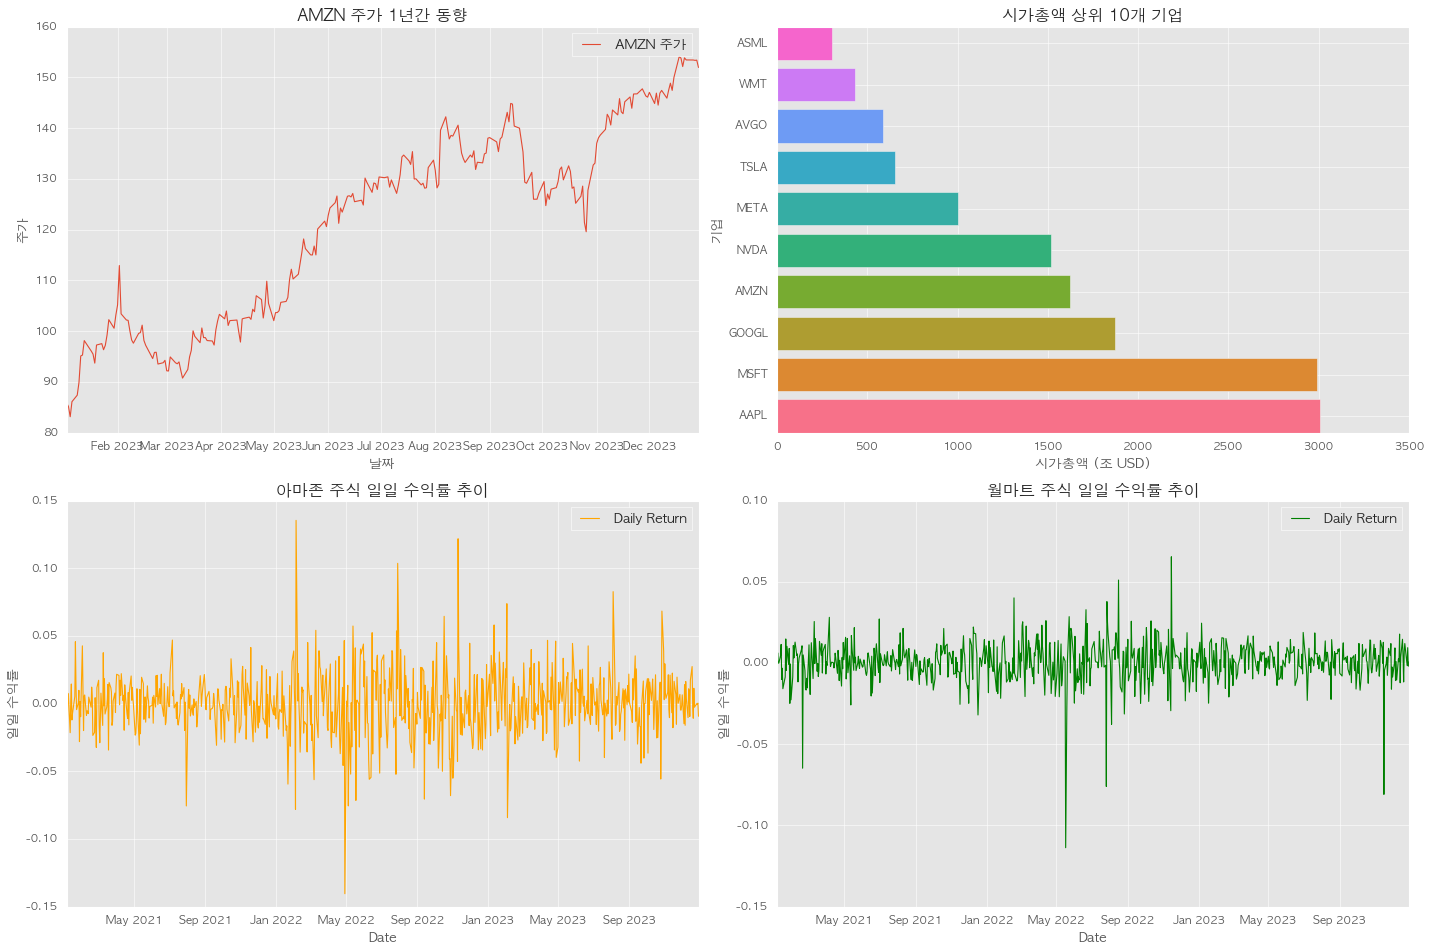

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import seaborn as sns
import yfinance as yf

# 스타일 설정
plt.style.use('ggplot')

# AMZ(Amazon)의 주가 데이터 가져오기
amz_stock = fdr.DataReader('AMZN', '2023-01-01', '2024-01-01')

# 주가 데이터 시각화
plt.figure(figsize=(18, 12))  # 가로 길이를 더 크게 조절

# 그래프 1: AMZN 주가
plt.subplot(2, 2, 1)
plt.plot(amz_stock['Close'], label='AMZN 주가')
plt.title('AMZN 주가 1년간 동향')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.legend()
plt.grid(True)

# 주어진 시가총액 데이터
market_caps = {
    'AAPL': 3010,
    'MSFT': 2990,
    'AMZN': 1620,
    'NVDA': 1520,
    'GOOGL': 1870,
    'META': 1000,
    'ASML': 305.498,
    'TSLA': 651.229,
    'AVGO': 586.987,
    'WMT': 432.104
}

# 시가총액 기준으로 내림차순 정렬
sorted_market_caps = dict(sorted(market_caps.items(), key=lambda item: item[1], reverse=True))

# 다양한 색상을 사용하기 위해 seaborn의 color_palette 활용
colors = sns.color_palette('husl', n_colors=len(sorted_market_caps))

# 그래프 2: 시가총액 상위 10개 기업
plt.subplot(2, 2, 2)
plt.barh(list(sorted_market_caps.keys()), list(sorted_market_caps.values()), color=colors)
plt.title('시가총액 상위 10개 기업')
plt.xlabel('시가총액 (조 USD)')
plt.ylabel('기업')

# 아마존 주식 데이터 다운로드
amazon_data = yf.download("AMZN", start="2021-01-01", end="2024-01-01")

# 그래프 3: 아마존 주식 일일 수익률 추이
plt.subplot(2, 2, 3)
amazon_data['Daily_Return'] = amazon_data['Adj Close'].pct_change()
plt.plot(amazon_data.index, amazon_data['Daily_Return'], label='Daily Return', color='orange')
plt.title('아마존 주식 일일 수익률 추이')
plt.xlabel('Date')
plt.ylabel('일일 수익률')
plt.legend()
plt.grid(True)

# 월마트 주식 데이터 다운로드
wmt_data = yf.download("WMT", start="2021-01-01", end="2024-01-01")

# 그래프 4: 월마트 주식 일일 수익률 추이
plt.subplot(2, 2, 4)
wmt_data['Daily_Return'] = wmt_data['Adj Close'].pct_change()
plt.plot(wmt_data.index, wmt_data['Daily_Return'], label='Daily Return', color='green')
plt.title('월마트 주식 일일 수익률 추이')
plt.xlabel('Date')
plt.ylabel('일일 수익률')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


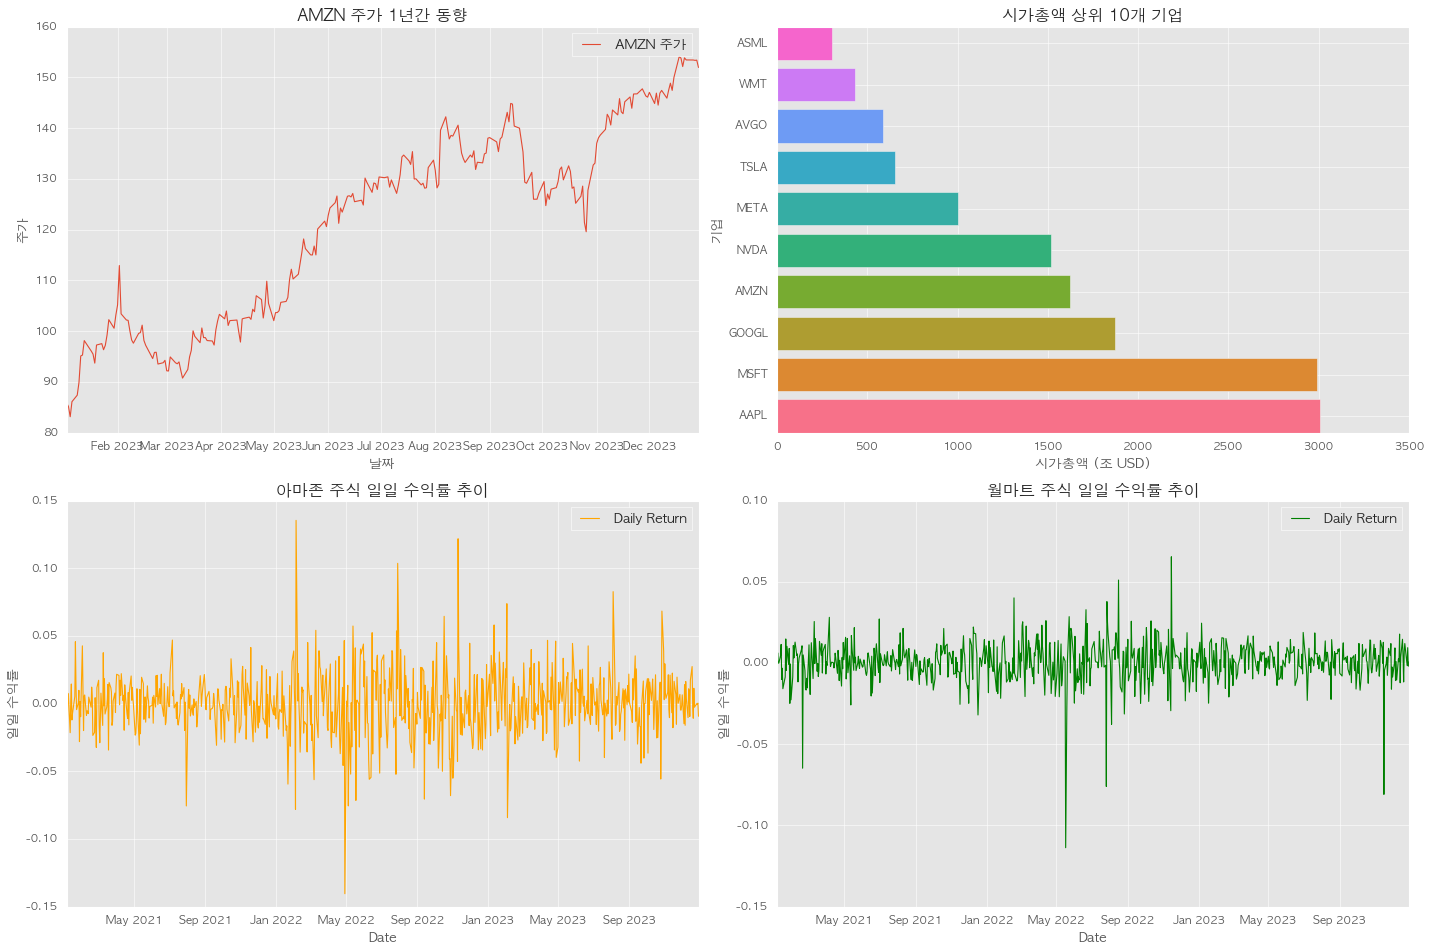

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import seaborn as sns
import yfinance as yf

# 스타일 설정
plt.style.use('ggplot')

# AMZ(Amazon)의 주가 데이터 가져오기
amz_stock = fdr.DataReader('AMZN', '2023-01-01', '2024-01-01')

# 주가 데이터 시각화
plt.figure(figsize=(18, 12))  # 가로 길이를 더 크게 조절

# 그래프 1: AMZN 주가
plt.subplot(2, 2, 1)
plt.plot(amz_stock['Close'], label='AMZN 주가')
plt.title('AMZN 주가 1년간 동향')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.legend()
plt.grid(True)

# 주어진 시가총액 데이터
market_caps = {
    'AAPL': 3010,
    'MSFT': 2990,
    'AMZN': 1620,
    'NVDA': 1520,
    'GOOGL': 1870,
    'META': 1000,
    'ASML': 305.498,
    'TSLA': 651.229,
    'AVGO': 586.987,
    'WMT': 432.104
}

# 시가총액 기준으로 내림차순 정렬
sorted_market_caps = dict(sorted(market_caps.items(), key=lambda item: item[1], reverse=True))

# 다양한 색상을 사용하기 위해 seaborn의 color_palette 활용
colors = sns.color_palette('husl', n_colors=len(sorted_market_caps))

# 그래프 2: 시가총액 상위 10개 기업
plt.subplot(2, 2, 2)
plt.barh(list(sorted_market_caps.keys()), list(sorted_market_caps.values()), color=colors)
plt.title('시가총액 상위 10개 기업')
plt.xlabel('시가총액 (조 USD)')
plt.ylabel('기업')

# 아마존 주식 데이터 다운로드
amazon_data = yf.download("AMZN", start="2021-01-01", end="2024-01-01")

# 그래프 3: 아마존 주식 일일 수익률 추이
plt.subplot(2, 2, 3)
amazon_data['Daily_Return'] = amazon_data['Adj Close'].pct_change()
plt.plot(amazon_data.index, amazon_data['Daily_Return'], label='Daily Return', color='orange')
plt.title('아마존 주식 일일 수익률 추이')
plt.xlabel('Date')
plt.ylabel('일일 수익률')
plt.legend()
plt.grid(True)

# 월마트 주식 데이터 다운로드
wmt_data = yf.download("WMT", start="2021-01-01", end="2024-01-01")

# 그래프 4: 월마트 주식 일일 수익률 추이
plt.subplot(2, 2, 4)
wmt_data['Daily_Return'] = wmt_data['Adj Close'].pct_change()
plt.plot(wmt_data.index, wmt_data['Daily_Return'], label='Daily Return', color='green')
plt.title('월마트 주식 일일 수익률 추이')
plt.xlabel('Date')
plt.ylabel('일일 수익률')
plt.legend()
plt.grid(True)

plt.tight_layout()

# 이미지 저장
plt.savefig('financial_analysis.png', dpi=300)  # 파일 이름과 dpi 설정
plt.show()
